In [1]:
# import time
import os
from skimage import io
import scipy as sp
import numpy as np
# import sys
import openpnm as op
import porespy as ps
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import rcParams
np.set_printoptions(precision=4)
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import math
import pickle

In [2]:
print(ps.__version__)

2.4.3


In [65]:
# Matplotlib plotting controls
plt.rc('axes', linewidth=2)
plt.rc('font', weight='bold')
params = {'figure.autolayout': True,
          'figure.titleweight': 'bold',
          'font.weight': 'bold',
          'font.size': 14,
          'font.family': 'sans-serif',
          'font.sans-serif': 'Arial',
          'legend.fontsize': 12,
#           'legend.title_fontsize':10,
          'figure.figsize': (6, 5),
          'figure.titlesize': 14,
          'axes.labelsize': 12,
          'axes.labelweight': 'bold',
          'axes.titlesize': 14,
          'axes.linewidth': 2,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'xtick.top': True,
          'xtick.bottom': True,
          'xtick.labeltop': False,
          'xtick.labelbottom': True,
          'ytick.left': True,
          'ytick.right': True,
          'ytick.labelright': False,
          'ytick.labelleft': True,
          'ytick.major.size': 5.5,
          'ytick.major.width': 0.8,
          'xtick.major.size': 5.5,
          'xtick.major.width': 0.8,
          'ytick.minor.size': 3.5,
          'ytick.minor.width': 0.6,
          'xtick.minor.size': 3.5,
          'xtick.minor.width': 0.6,
        'xtick.minor.visible':True,
         'ytick.minor.visible':True}
rcParams.update(params)

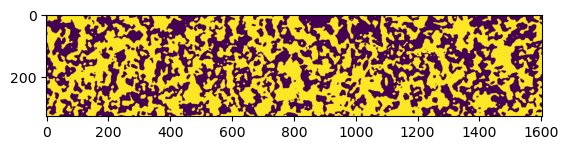

In [4]:
path = './data/total volumes/'
pris = io.imread(path+'pristine_segment_crop.tif')
pris_void = pris==0
pris_solid = ~pris_void
plt.imshow(pris_void[100,:,:])


In [161]:
print(len(pris))
print(len(comp))
print(len(uncomp))

591
232
226


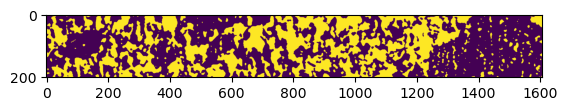

In [5]:
path = './data/total volumes/'
comp = io.imread(path+'comp_segment_crop.tif')
comp_void = comp==0
comp_solid = ~comp_void
plt.imshow(comp_void[100,:,:])


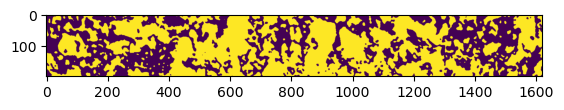

In [6]:
path = './data/total volumes/'
uncomp = io.imread(path+'uncomp_segment_crop.tif')
uncomp_void = uncomp==0
uncomp_solid = ~uncomp_void
plt.imshow(uncomp_void[100,:,:])


In [33]:
# thk_pris_void = ps.filters.local_thickness(pris_void,mode='hybrid',sizes=50)

In [ ]:
# path = './data/total volumes/'
# with open(path+"pris_void_local_thickness.pkl", "wb") as f:
#     pickle.dump(thk_pris_void, f)

In [ ]:
path = './data/total volumes/'
with open(path+"pris_void_local_thickness.pkl", "rb") as f:
    thk_pris_void = pickle.load(f)

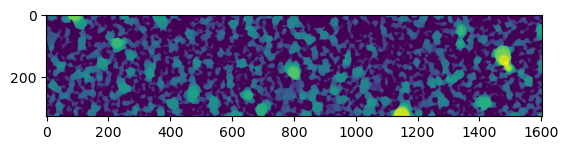

In [34]:
plt.imshow(thk_pris_void[100,:,:])

In [36]:
# thk_comp_void = ps.filters.local_thickness(comp_void,mode='hybrid',sizes=50)

In [37]:
# path = './data/total volumes/'
# with open(path+"comp_void_local_thickness.pkl", "wb") as f:
#     pickle.dump(thk_comp_void, f)

In [38]:
path = './data/total volumes/'
with open(path+"comp_void_local_thickness.pkl", "rb") as f:
    comp_pris_void = pickle.load(f)

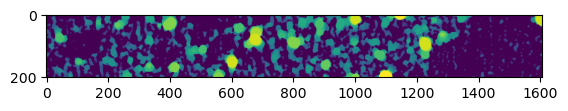

In [39]:
plt.imshow(thk_comp_void[100,:,:])

In [ ]:
# thk_uncomp_void = ps.filters.local_thickness(uncomp_void,mode='hybrid',sizes=50)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# path = './data/total volumes/'
# with open(path+"uncomp_void_local_thickness.pkl", "wb") as f:
#     pickle.dump(thk_uncomp_void, f)

In [41]:
path = './data/total volumes/'
with open(path+"uncomp_void_local_thickness.pkl", "rb") as f:
    uncomp_pris_void = pickle.load(f)

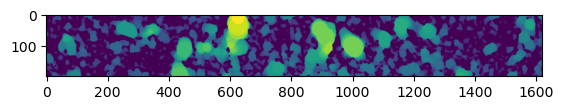

In [42]:
plt.imshow(thk_uncomp_void[100,:,:])

In [46]:
dist_pris_void = ps.metrics.pore_size_distribution(im=thk_pris_void,bins=20,log=False,voxel_size=6e-9)
dist_comp_void = ps.metrics.pore_size_distribution(im=thk_comp_void,bins=20,log=False,voxel_size=6e-9)
dist_uncomp_void = ps.metrics.pore_size_distribution(im=thk_uncomp_void,bins=20,log=False,voxel_size=6e-9)

In [80]:
print(dist_comp_void.bin_centers==dist_comp_void.bin_centers)
print(dist_comp_void.R)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[1.0009e-08 1.8028e-08 2.6046e-08 3.4064e-08 4.2083e-08 5.0101e-08
 5.8120e-08 6.6138e-08 7.4157e-08 8.2175e-08 9.0193e-08 9.8212e-08
 1.0623e-07 1.1425e-07 1.2227e-07 1.3029e-07 1.3830e-07 1.4632e-07
 1.5434e-07 1.6236e-07]


Text(0, 0.5, 'Normalized PDF')

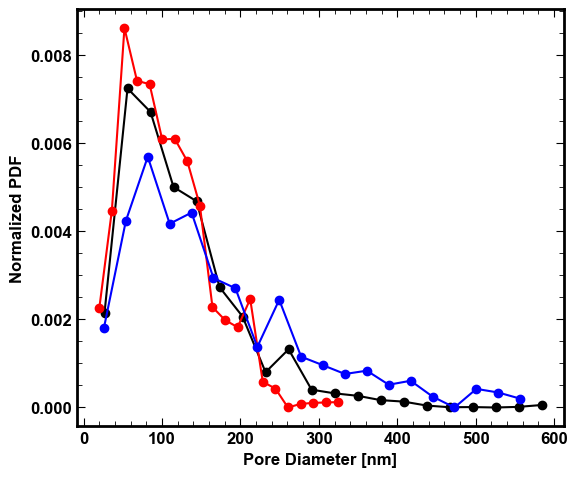

In [ ]:
fig, ax = plt.subplots()

ax.plot(dist_pris_void.R*2*10**9,dist_pris_void.pdf/(2*10**9),'ko-')
ax.plot(dist_comp_void.R*2*10**9,dist_comp_void.pdf/(2*10**9),'ro-')
ax.plot(dist_uncomp_void.R*2*10**9,dist_uncomp_void.pdf/(2*10**9),'bo-')

ax.set_xlabel('Pore Diameter [nm]')
ax.set_ylabel('Normalized PDF')


Text(0, 0.5, 'CDF')

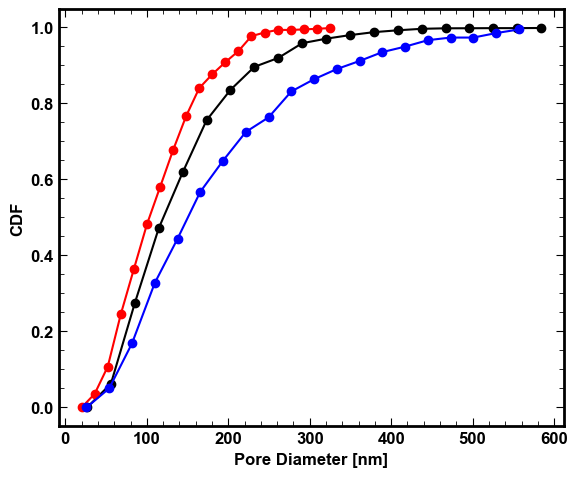

In [157]:
fig, ax = plt.subplots()

ax.plot(dist_pris_void.R*2*10**9,1-dist_pris_void.cdf,'ko-')
ax.plot(dist_comp_void.R*2*10**9,1-dist_comp_void.cdf,'ro-')
ax.plot(dist_uncomp_void.R*2*10**9,1-dist_uncomp_void.cdf,'bo-')

ax.set_xlabel('Pore Diameter [nm]')
ax.set_ylabel('CDF')

In [49]:
# Solids

In [ ]:
# thk_pris_solid = ps.filters.local_thickness(pris_solid,mode='hybrid',sizes=50)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# path = './data/total volumes/'
# with open(path+"pris_solid_local_thickness.pkl", "wb") as f:
#     pickle.dump(thk_pris_solid, f)

In [52]:
path = './data/total volumes/'
with open(path+"pris_solid_local_thickness.pkl", "rb") as f:
    thk_pris_solid = pickle.load(f)

In [ ]:
# thk_comp_solid = ps.filters.local_thickness(comp_solid,mode='hybrid',sizes=50)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# path = './data/total volumes/'
# with open(path+"comp_solid_local_thickness.pkl", "wb") as f:
#     pickle.dump(thk_comp_solid, f)

In [55]:
path = './data/total volumes/'
with open(path+"comp_solid_local_thickness.pkl", "rb") as f:
    thk_comp_solid = pickle.load(f)

In [ ]:
# thk_uncomp_solid = ps.filters.local_thickness(uncomp_solid,mode='hybrid',sizes=50)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# path = './data/total volumes/'
# with open(path+"uncomp_solid_local_thickness.pkl", "wb") as f:
#     pickle.dump(thk_uncomp_solid, f)

In [58]:
path = './data/total volumes/'
with open(path+"uncomp_solid_local_thickness.pkl", "rb") as f:
    thk_uncomp_solid = pickle.load(f)

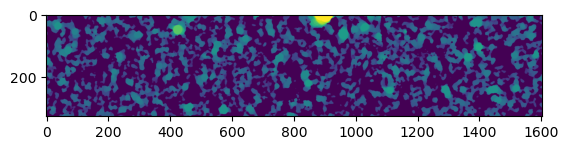

In [59]:
plt.imshow(thk_pris_solid[100,:,:])

In [60]:
dist_pris_solid = ps.metrics.pore_size_distribution(im=thk_pris_solid,bins=20,log=False,voxel_size=6e-9)
dist_comp_solid = ps.metrics.pore_size_distribution(im=thk_comp_solid,bins=20,log=False,voxel_size=6e-9)
dist_uncomp_solid = ps.metrics.pore_size_distribution(im=thk_uncomp_solid,bins=20,log=False,voxel_size=6e-9)

In [68]:
print(dist_pris_solid)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Results of pore_size_distribution generated at Fri Sep  5 15:46:40 2025
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
R                         Array of size (20,)
pdf                       Array of size (20,)
cdf                       Array of size (20,)
satn                      Array of size (20,)
bin_centers               Array of size (20,)
bin_edges                 Array of size (21,)
bin_widths                Array of size (20,)
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


Text(0, 0.5, 'Normalized PDF')

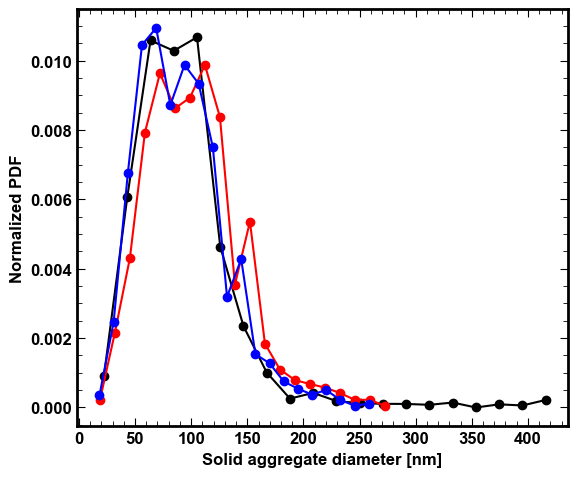

In [82]:
fig, ax = plt.subplots()

ax.plot(dist_pris_solid.R*2*10**9,dist_pris_solid.pdf/(2*10**9),'ko-')
ax.plot(dist_comp_solid.R*2*10**9,dist_comp_solid.pdf/(2*10**9),'ro-')
ax.plot(dist_uncomp_solid.R*2*10**9,dist_uncomp_solid.pdf/(2*10**9),'bo-')

ax.set_xlabel('Solid aggregate diameter [nm]')
ax.set_ylabel('Normalized PDF')



In [132]:
def log_normal_cdf(x,mu,sigma):
    y = 0.5*(1+sp.special.erf((np.log(x)-mu)/(sigma*np.sqrt(2))))
    return y

In [139]:
popt_pris_solid,_ = curve_fit(log_normal_cdf,dist_pris_solid.R*2*10**9,1-dist_pris_solid.cdf)
print('mu, sigma for pristine solid: ',popt_pris_solid)
popt_uncomp_solid,_ = curve_fit(log_normal_cdf,dist_uncomp_solid.R*2*10**9,1-dist_uncomp_solid.cdf)
print('mu, sigma for pristine solid: ',popt_uncomp_solid)
popt_comp_solid,_ = curve_fit(log_normal_cdf,dist_comp_solid.R*2*10**9,1-dist_comp_solid.cdf)
print('mu, sigma for pristine solid: ',popt_comp_solid)

mu, sigma for pristine solid:  [4.5608 0.3642]
mu, sigma for pristine solid:  [4.5171 0.3958]
mu, sigma for pristine solid:  [4.6327 0.3789]


In [148]:
pris_solid_median_size = np.exp(popt_pris_solid[0])
print(pris_solid_median_size)
uncomp_solid_median_size = np.exp(popt_uncomp_solid[0])
print(uncomp_solid_median_size)
comp_solid_median_size = np.exp(popt_comp_solid[0])
print(comp_solid_median_size)

95.65936763096971
91.57305133013621
102.7875981447694


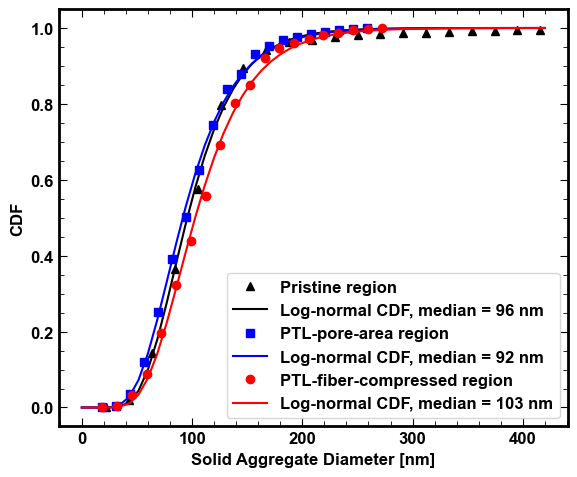

In [155]:
fig, ax = plt.subplots()

cdf_x = np.linspace(0,420)

ax.plot(dist_pris_solid.R*2*10**9,1-dist_pris_solid.cdf,'k^', label='Pristine region')
ax.plot(cdf_x,log_normal_cdf(cdf_x,*popt_pris_solid),'k-',label='Log-normal CDF, median = {:.0f} nm'.format(pris_solid_median_size))

ax.plot(dist_uncomp_solid.R*2*10**9,1-dist_uncomp_solid.cdf,'bs', label='PTL-pore-area region')
ax.plot(cdf_x,log_normal_cdf(cdf_x,*popt_uncomp_solid),'b-',label='Log-normal CDF, median = {:.0f} nm'.format(uncomp_solid_median_size))

ax.plot(dist_comp_solid.R*2*10**9,1-dist_comp_solid.cdf,'ro',label='PTL-fiber-compressed region' )
ax.plot(cdf_x,log_normal_cdf(cdf_x,*popt_comp_solid),'r-',label='Log-normal CDF, median = {:.0f} nm'.format(comp_solid_median_size))

ax.set_xlabel('Solid Aggregate Diameter [nm]')
ax.set_ylabel('CDF')
ax.legend()
plt.savefig('anode_CL_solid_size_CDF.png',dpi=400)